### **Here we are predicting the 2 numbers of our operations**

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#2 layer convolutional network
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.2200 - acc: 0.9312
Epoch 2/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0806 - acc: 0.9748
Epoch 3/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0536 - acc: 0.9837
Epoch 4/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0376 - acc: 0.9884
Epoch 5/5
10000/10000 [==============================] - 1s 83us/step
test_acc: 0.9794


In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
train_labels = to_categorical(train_labels)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### **Our NN to predict the operator of our image**

In [0]:
#import all the packages required to read image
import numpy as np
np.random.seed(1234)
import skimage
from skimage import io
from skimage.color import rgb2gray, rgb2grey
from skimage.transform import resize
from skimage.io import imread_collection, concatenate_images
from skimage.util import invert
import matplotlib.pyplot as plt

# **Creating our trainning Set for Operators**

In [0]:
#connect to our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#link your path 
plus_dir = '/content/drive/My Drive/DS8009 Deep Learning/Assignment 1/Math Symbols/plus/*.jpg'
sub_dir = '/content/drive/My Drive/DS8009 Deep Learning/Assignment 1/Math Symbols/subtract/*.jpg'
mult_dir = '/content/drive/My Drive/DS8009 Deep Learning/Assignment 1/Math Symbols/multiply/*.jpg'
div_dir = '/content/drive/My Drive/DS8009 Deep Learning/Assignment 1/Math Symbols/divide/*.jpg'

#creating a collection with the available images
plus = imread_collection(plus_dir)
sub = imread_collection(sub_dir)
mult = imread_collection(mult_dir)
div = imread_collection(div_dir)


In [0]:
#change it to array
plus2 = np.invert(concatenate_images(plus)) #invert the image (to white background)
sub2 = np.invert(concatenate_images(sub)) #invert the image (to white background)
mult2 = np.invert(concatenate_images(mult))
div2 = np.invert(concatenate_images(div)) #invert the image to white background

In [0]:
plus2.shape, sub2.shape, mult2.shape, div2.shape

((472, 45, 45), (400, 45, 45), (85, 45, 45), (169, 45, 45))

In [0]:
#concatenate all the sub folders into 1 array
operator_img = np.concatenate([plus2,sub2,mult2,div2])
operator_img.shape

(1126, 45, 45)

In [0]:
#creating true class label of operators, 0 = add, 1 = subtract, 2 = multiply, 3 = divide
class_label = [0]*472+[1]*400+[2]*85+[3]*169
class_label = np.asarray(class_label)
class_label.shape, class_label

((1126,), array([0, 0, 0, ..., 3, 3, 3]))

## **Create our Test Set for Operators**

In [0]:
tplus_dir = '/content/drive/My Drive/DS8009 Deep Learning/Assignment 1/Math Symbols/test/add/*.jpg'
tsub_dir = '/content/drive/My Drive/DS8009 Deep Learning/Assignment 1/Math Symbols/test/sub/*.jpg'
tmult_dir = '/content/drive/My Drive/DS8009 Deep Learning/Assignment 1/Math Symbols/test/multiply/*.jpg'
tdiv_dir = '/content/drive/My Drive/DS8009 Deep Learning/Assignment 1/Math Symbols/test/div/*.jpg'

tplus = imread_collection(tplus_dir)
tsub = imread_collection(tsub_dir)
tmult = imread_collection(tmult_dir)
tdiv = imread_collection(tdiv_dir)

In [0]:
tplus2 = np.invert(concatenate_images(tplus)) #invert the image (to white background)
tsub2 = np.invert(concatenate_images(tsub)) #invert the image (to white background)
tmult2 = np.invert(concatenate_images(tmult))
tdiv2 = np.invert(concatenate_images(tdiv)) #invert the image to white background

In [0]:
tplus2.shape, tsub2.shape, tmult2.shape, tdiv2.shape

((8, 45, 45), (6, 45, 45), (4, 45, 45), (7, 45, 45))

In [0]:
toperator_img = np.concatenate([tplus2,tsub2,tmult2,tdiv2])
toperator_img.shape

(25, 45, 45)

In [0]:
testop_label = [0]*8+[1]*6+[2]*4+[3]*7
testop_label = np.asarray(testop_label)
testop_label

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3])

# Train our Operator Model NN

In [0]:
operator_img = operator_img.reshape((1126, 45 * 45))
operator_img = operator_img.astype('float32') / 255
toperator_img = toperator_img.reshape((25, 45 * 45))
toperator_img = toperator_img.astype('float32') / 255

#5 layer convolutional network
from keras import models
from keras import layers
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(45 * 45,)))
network2.add(layers.Dense(512, activation='relu', input_shape=(45 * 45,)))
network2.add(layers.Dense(512, activation='relu', input_shape=(45 * 45,)))
network2.add(layers.Dense(512, activation='relu', input_shape=(45 * 45,)))
network2.add(layers.Dense(4,activation='softmax'))

from keras.utils import to_categorical
class_label = to_categorical(class_label, num_classes=4)
testop_label = to_categorical(testop_label, num_classes=4)

network2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
network2.fit(operator_img, class_label, epochs=5, batch_size=128)

test_loss, test_acc = network2.evaluate(toperator_img, testop_label)
print('test_acc:', test_acc)

Epoch 1/5
1126/1126 [==============================] - 1s 497us/step - loss: 0.9696 - acc: 0.5879
Epoch 2/5
1126/1126 [==============================] - 0s 273us/step - loss: 0.1391 - acc: 0.9689
Epoch 3/5
1126/1126 [==============================] - 0s 295us/step - loss: 0.0192 - acc: 0.9964
Epoch 4/5
1126/1126 [==============================] - 0s 348us/step - loss: 0.0015 - acc: 1.0000
Epoch 5/5
25/25 [==============================] - 0s 2ms/step
test_acc: 0.9599999785423279


### **Using our 2 layer network onto our image**


In [0]:
#connect to our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#change working directory
import os
os.chdir('/content/drive/My Drive/DS8009 Deep Learning/Assignment 1')

In [0]:
os.listdir()

['seven.png',
 'test.ipynb',
 '6plus7.png',
 '4times9.jpg',
 '2times3.jpg',
 '6plus2.jpg',
 'operators.jpg',
 'Math Symbols',
 'MathOpPrediction.ipynb',
 '6div2.jpg',
 '7div2.jpg',
 '3times2.jpg',
 '8div2.jpg',
 '1plus1.jpg',
 'Copy of 7div2.jpg',
 'Assignment1_DS8009Leo.ipynb']

In [0]:
#import all the packages required to read image
import numpy as np
np.random.seed(1234)
import skimage
from skimage import io
from skimage.color import rgb2gray, rgb2grey
from skimage.transform import resize
import matplotlib.pyplot as plt

# **Read our Image**

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


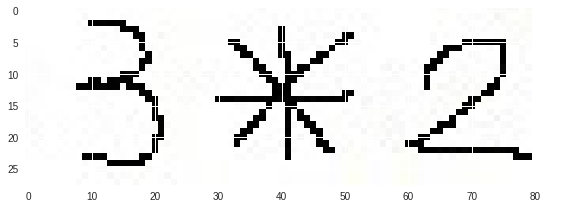

In [0]:
#here we try and see if our NN works 
img1 = io.imread(fname='3times2.jpg', as_gray=True)
io.imshow(img1)
plt.imshow(img1)
plt.show()

In [0]:
#check to see the shape, if its RGB convert to grayscale
img1.shape

(28, 84, 3)

In [0]:
#converting the image from RGB to grayscale
img2=1-np.dot(img1,[0.299, 0.587, 0.114])
img2

array([[-254., -254., -254., ..., -254., -254., -254.],
       [-254., -254., -254., ..., -254., -254., -254.],
       [-254., -254., -254., ..., -254., -254., -254.],
       ...,
       [-254., -254., -254., ..., -254., -254., -254.],
       [-254., -254., -254., ..., -254., -254., -254.],
       [-254., -254., -254., ..., -254., -254., -254.]])

In [0]:
#we see the (, , 3) is gone which means its in gray scale
img2.shape

(28, 84)

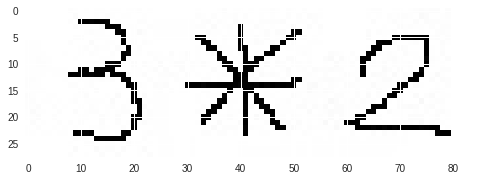

In [0]:
#function to normalize to [0-1]
def norm(arr):
  arr2= arr - np.min(arr)
  arr3= arr2 / np.max(arr2)
  return arr3

#normalize the number, and show the image in grayscale
img3=norm(img2)
plt.imshow(img2)
plt.show()

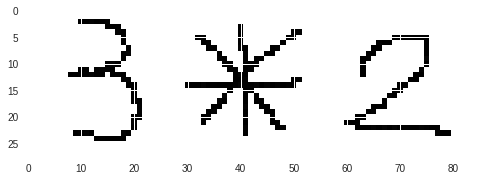

In [0]:
# remove noisy
def thresh(x, alpha):
  if x > alpha:
   return x
  else:
   return 0.0

img4=np.vectorize(thresh)(img3, 0.5)
plt.imshow(img4)
plt.show()

## **Change our coordinates for our number**

In [0]:
#put our numbers into coordinates, eyeball it
number1, operator, number2, = img4[0:,2:28], img4[0:,29:56], img4[3:,57:86]

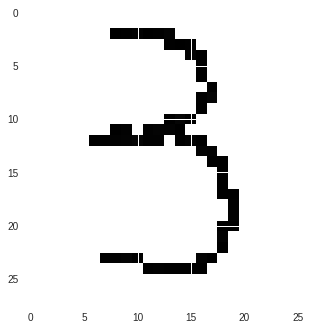

In [0]:
#check to see whether the number is number we cropped is correct
plt.imshow(number1)

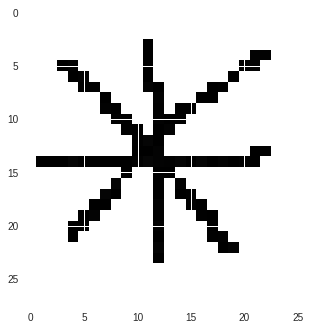

In [0]:
#check to see whether the number is number we cropped is correct
plt.imshow(operator)

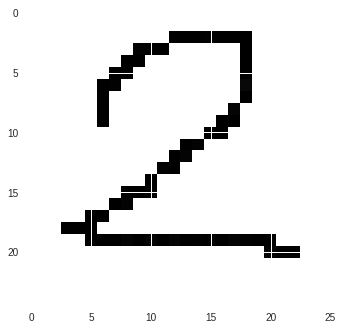

In [0]:
#check to see whether the number is number we cropped is correct
plt.imshow(number2)

In [0]:
#convert the number them to their respective scale to test our NN

number1 = resize(number1,(28,28))
number2 = resize(number2,(28,28))
operator = resize(operator,(45,45))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


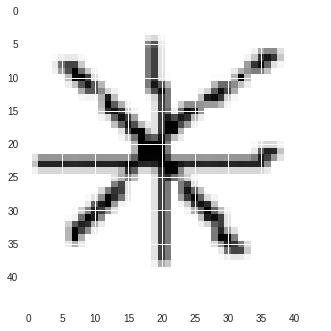

In [0]:
#check to see the number in a different scale
plt.imshow(operator)
#plt.imshow(number1)
#plt.imshow(number2)

In [0]:
numb1_pred = np.argmax(np.round(network.predict(number1.reshape(1, 784)),2)) #number are tested on 28*28
numb2_pred = np.argmax(np.round(network.predict(number2.reshape(1, 784)),2))
operator_pred = np.argmax(np.round(network2.predict(operator.reshape(1, 2025)),2)) #operator img is tested on 45*45
print(numb1_pred, numb2_pred, operator_pred)

3 2 2


# **Here we test the results!**

In [0]:
if operator_pred == 0:
  result = numb1_pred + numb2_pred
  print(result)
elif operator_pred == 1:
  result = numb1_pred - numb2_pred
  print(result)
elif operator_pred == 2:
  result = numb1_pred * numb2_pred
  print(result)
else:
  result = numb1_pred / numb2_pred
  print(result)
   

6
